# Bellabeat Case Study

# Phase 1: Understanding the Business.
**Business Task** : To analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices, select one Bellabeat product to apply these insights and make recommendations for Bellabeat marketing strategy.

The business questions are:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

# Phase 2: Data Collection and Understanding

**Data source**: I used FitBit Fitness Tracker Data for this case study.
This is a Kaggle dataset made available through Mobius. It was generated by respondents to a distributed survey on Amazon Mechanical Turk between 03-December 2016 and 05-December 2016. It contains personal fitness tracker from thirty-three fitbit users. thirty-three eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 


**Limitations**: 
* The sample size is small as only 33 individuals were considered. 

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#setting the layout
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 9)  
pd.set_option('display.width', 1000)
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the relevant dataset
activity = pd.read_csv('dailyActivity_merged.csv')
weight = pd.read_csv('weightLogInfo_merged.csv')
sleep = pd.read_csv('sleepDay_merged.csv')
intensity = pd.read_csv('hourlyIntensities_merged.csv')

After reading the data, I used head and info function to show a preview of the data structure and to identify any inconsistency

In [3]:
print("Daily Activity Data")
print(activity.head(2))
print("Weight Data")
print(weight.head(2))
print("Sleep Data")
print(sleep.head(2))
print("Intensity Data")
print(intensity.head(2))

Daily Activity Data
           Id ActivityDate  TotalSteps  TotalDistance  ...  FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories
0  1503960366    4/12/2016       13162           8.50  ...                   13                   328               728      1985
1  1503960366    4/13/2016       10735           6.97  ...                   19                   217               776      1797

[2 rows x 15 columns]
Weight Data
           Id                  Date   WeightKg  WeightPounds   Fat    BMI  IsManualReport          LogId
0  1503960366  5/2/2016 11:59:59 PM  52.599998    115.963147  22.0  22.65            True  1462233599000
1  1503960366  5/3/2016 11:59:59 PM  52.599998    115.963147   NaN  22.65            True  1462319999000
Sleep Data
           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
0  1503960366  4/12/2016 12:00:00 AM                  1                 327             346
1  1503960366  4/13/2016 12:00:00 AM         

In [4]:
print("Daily Activity Data")
print(activity.info())
print("Weight Data")
print(weight.info())
print("Sleep Data")
print(sleep.info())
print("Intensity Data")
print(intensity.info())

Daily Activity Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int

**understanding of dataset :** For simplicity, I will be making use of daily and hourly data of activities, intensity, weight and sleep dataset.
* DateTime values are formatted as object, it needs to be transformed seperately into the date and time format.
* The "Fat" column of the weight dataset has missing values, this can be a result of the value not reported by the users since it requires manual reporting.

# Phase 3: Data Processing



In [5]:
#checking for unique users in each table
print("Daily Activity Users")
print(activity.Id.nunique())
print("Weight Users")
print(weight.Id.nunique())
print("Sleep Users")
print(sleep.Id.nunique())
print("Intensity Users")
print(intensity.Id.nunique())

Daily Activity Users
33
Weight Users
8
Sleep Users
24
Intensity Users
33


In [6]:
# Checking for duplicate values
print("Daily Activity Duplicates")
print(activity.duplicated().sum())
print("Weight Duplicates")
print(weight.duplicated().sum())
print("Sleep Duplicates")
print(sleep.duplicated().sum())
print("Intensity Duplicates")
print(intensity.duplicated().sum())

Daily Activity Duplicates
0
Weight Duplicates
0
Sleep Duplicates
3
Intensity Duplicates
0


In [7]:
#removing duplicate values
sleep.drop_duplicates(inplace=True)
print(sleep.duplicated().sum())

0


In [8]:
# Remove Fat column from weight data (It has only two non-null values)
weight.drop(['Fat'], axis = 1,inplace=True)

In [9]:
#fixing the DateTime column and seperate into date, day and time column.
#activity
activity['ActivityDate']=pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')
activity['Date'] = activity['ActivityDate']
activity['Day']=activity['Date'].dt.day_name()
#weight
weight.rename(columns={'Date':'weightDate'}, inplace=True)
weight['weightDate']=pd.to_datetime(weight['weightDate'], format='mixed')
weight['Date'] = pd.to_datetime(weight['weightDate'].dt.date,format='%m/%d/%Y')
weight['Time'] = weight['weightDate'].dt.strftime('%H:%M:%S')
#sleep
sleep['SleepDay']= pd.to_datetime(sleep['SleepDay'], format='mixed')
sleep['Date'] = pd.to_datetime(sleep['SleepDay'].dt.date,format='%m/%d/%Y')
sleep['Time'] = sleep['SleepDay'].dt.strftime('%H:%M:%S')
#intensity
intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'], format='mixed')
intensity['Date'] = pd.to_datetime(intensity['ActivityHour'].dt.date,format='%m/%d/%Y')
intensity['Time'] = intensity['ActivityHour'].dt.strftime('%H:%M:%S')

In [10]:
#percentage of missing values in weight dataset
(weight.isnull().sum())*100/len(activity)

Id                0.0
weightDate        0.0
WeightKg          0.0
WeightPounds      0.0
BMI               0.0
IsManualReport    0.0
LogId             0.0
Date              0.0
Time              0.0
dtype: float64

# Phase 4: Data Analysis

In [11]:

activity.describe().T

,count,mean,min,25%,50%,75%,max,std
Id,940.0,4855407369.332978,1503960366.0,2320127002.0,4445114986.0,6962181067.0,8877689391.0,2424805475.65796
ActivityDate,940,2016-04-26 06:53:37.021276672,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-26 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
TotalSteps,940.0,7637.910638,0.0,3789.75,7405.5,10727.0,36019.0,5087.150742
TotalDistance,940.0,5.489702,0.0,2.62,5.245,7.7125,28.030001,3.924606
TrackerDistance,940.0,5.475351,0.0,2.62,5.245,7.71,28.030001,3.907276
LoggedActivitiesDistance,940.0,0.108171,0.0,0.0,0.0,0.0,4.942142,0.619897
VeryActiveDistance,940.0,1.502681,0.0,0.0,0.21,2.0525,21.92,2.658941
ModeratelyActiveDistance,940.0,0.567543,0.0,0.0,0.24,0.8,6.48,0.88358
LightActiveDistance,940.0,3.340819,0.0,1.945,3.365,4.7825,10.71,2.040655
SedentaryActiveDistance,940.0,0.001606,0.0,0.0,0.0,0.0,0.11,0.007346


In [12]:
weight.describe().T

,count,mean,min,25%,50%,75%,max,std
Id,67.0,7009282134.656716,1503960366.0,6962181067.0,6962181067.0,8877689391.0,8877689391.0,1950321943.915199
weightDate,67,2016-04-27 15:39:54.283582208,2016-04-12 06:47:11,2016-04-19 15:19:45,2016-04-27 23:59:59,2016-05-04 15:24:10.500000,2016-05-12 23:59:59,NaN
WeightKg,67.0,72.035821,52.599998,61.400002,62.5,85.049999,133.5,13.923206
WeightPounds,67.0,158.811801,115.963147,135.363832,137.788914,187.503152,294.31712,30.695415
BMI,67.0,25.185224,21.450001,23.959999,24.389999,25.559999,47.540001,3.066963
LogId,67.0,1461771594283.582031,1460443631000.0,1461079185000.0,1461801599000.0,1462375450500.0,1463097599000.0,782994783.609251
Date,67,2016-04-26 22:12:32.238806016,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-27 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN


In [13]:
sleep.describe().T

,count,mean,min,25%,50%,75%,max,std
Id,410.0,4994963040.965854,1503960366.0,3977333714.0,4702921684.0,6962181067.0,8792009665.0,2060863238.13152
SleepDay,410,2016-04-26 11:38:55.609756160,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-27 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN
TotalSleepRecords,410.0,1.119512,1.0,1.0,1.0,1.0,3.0,0.346636
TotalMinutesAsleep,410.0,419.173171,58.0,361.0,432.5,490.0,796.0,118.635918
TotalTimeInBed,410.0,458.482927,61.0,403.75,463.0,526.0,961.0,127.45514
Date,410,2016-04-26 11:38:55.609756160,2016-04-12 00:00:00,2016-04-19 00:00:00,2016-04-27 00:00:00,2016-05-04 00:00:00,2016-05-12 00:00:00,NaN


**From the statistics summary, we can infer the below key findings :**
* The daily average steps taken is 7638 with average distance of 5.5km
* The daily average very active, lightly active and sedentary minutes is 21, 192 and 991 miunutes respectively. The average sedentary minutes of the participants are very high and needs to be reduced, and active minutes needs to improve
* The average daily calories burned is 2304 cal
* The average weight and BMI is 158lb and 25, however we don't have enough information to make most of this(i.e, whats there age? gender? height? etc) and less than 30% of the users (only 8 users) made use of the weight feature.
* The average sleep time of 419 minutes is less than 480 minutes of recommended sleep time.


In [14]:
#merging the daily activty and sleep day dataset
merged_data = activity.merge(sleep, how='left', on=['Id', 'Date'])

In [15]:
selected_col = merged_data[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed']]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1300x1000 with 0 Axes>

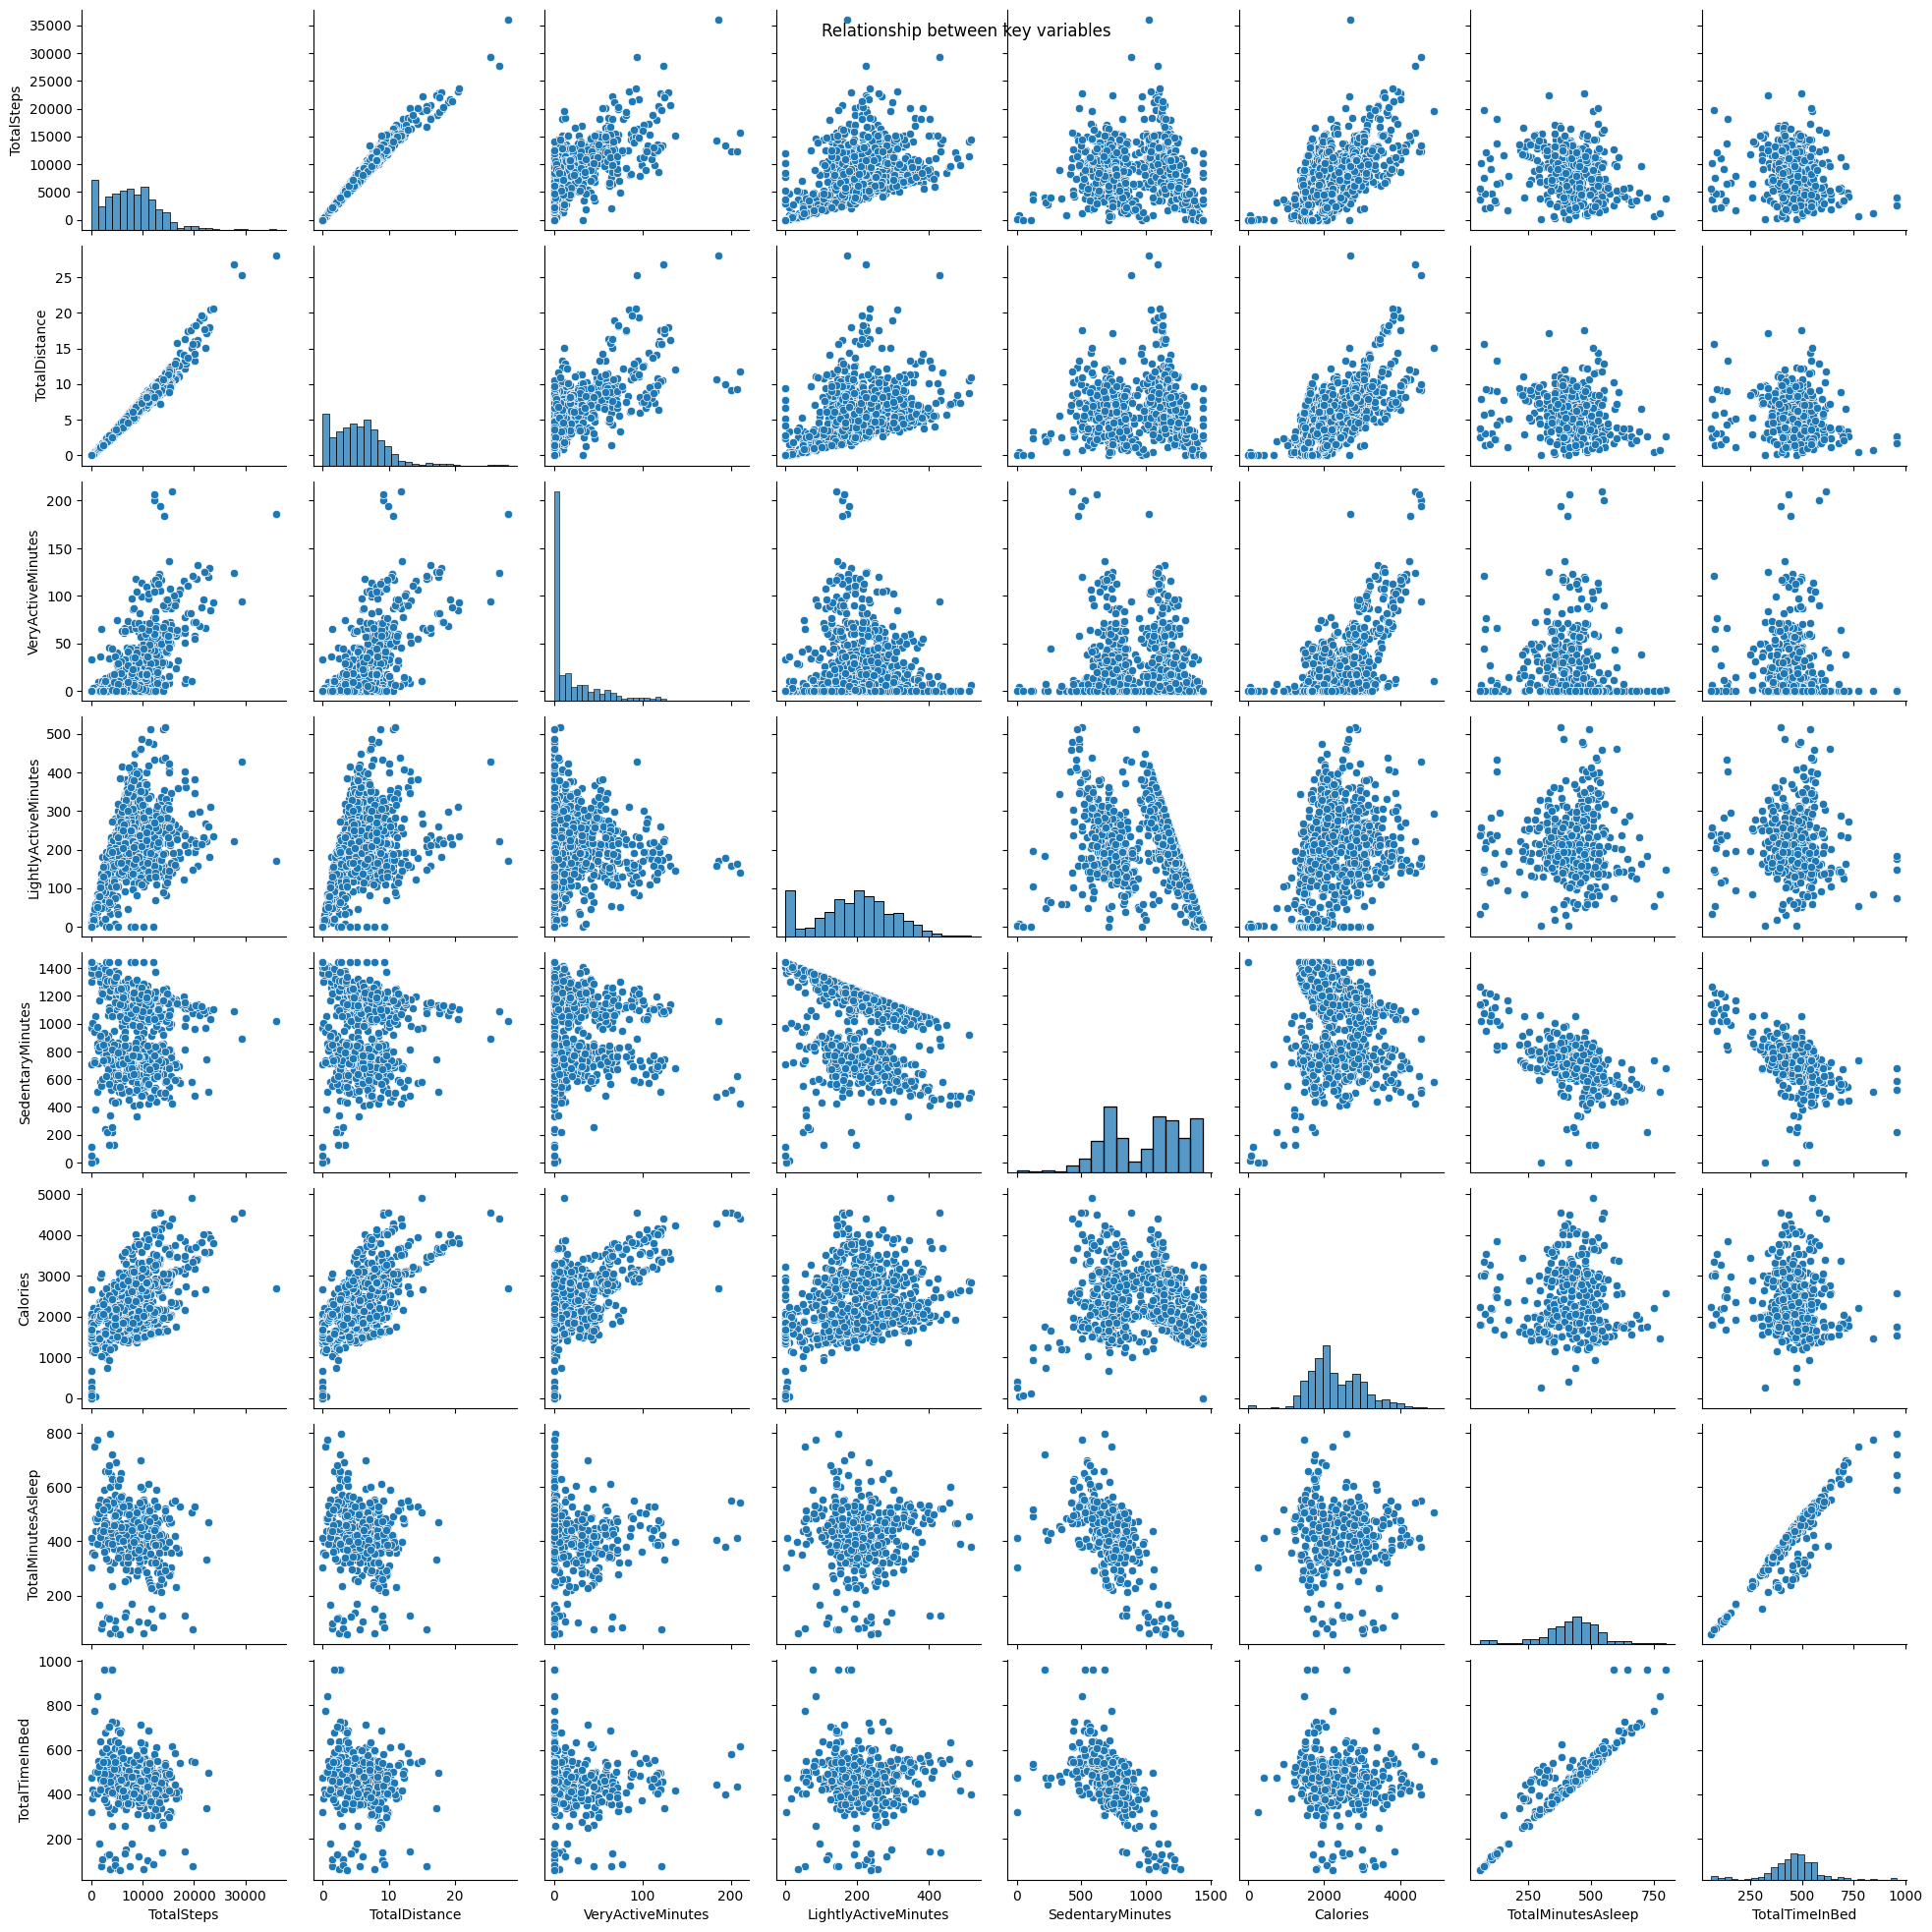

In [16]:
plt.figure(figsize=(13,10))
sns.pairplot(selected_col)
plt.suptitle('Relationship between key variables')
plt.show

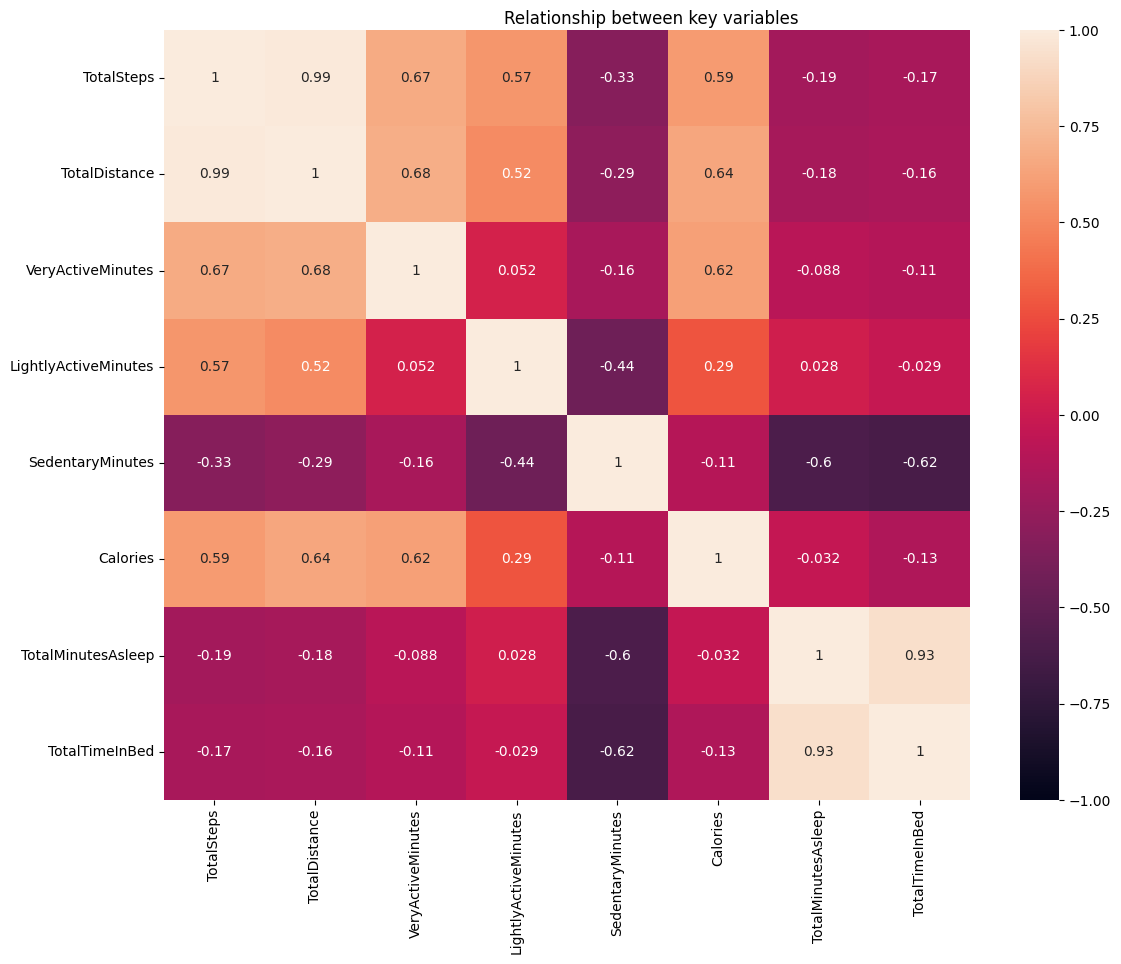

In [17]:
plt.figure(figsize=(13, 10))
sns.heatmap(selected_col.corr(), annot = True, vmin = -1, vmax = 1)
plt.suptitle('Relationship between key variables', y=0.9)
plt.show()



**from the pair and heat map plot, :**
* The number of steps has a strong positive correlation with amount of distance covered. An increase in number of steps leads to increase in covered distance.
* There is a positive corelation between steps taken and very active minutes,Lightly active minutes and calories burned. This means increase in number of steps leads to increase in the active or fairly active minutes and the amount of calories burned.
* Time in bed has a strong positive correlation with minute spent asleep and a very weak negative correlation with amount of calories burned. This means that Spending time on bed increase our chances of sleeping and does not improve the amount of calories burned
* There is a strong negative correlation between sedentary minutes and the time asleep. This means an increase in sedentary time leads to decrease in time spent asleep
* Sendentary minute has a weak negative correlation with calories burned. this simply means that increase in sendentary time lowers the amount of calories burned

In [18]:
merged_data_avg=merged_data.groupby('Id')[['TotalSteps', 'Calories','VeryActiveMinutes', 'SedentaryMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed']].mean()

In [19]:
merged_data_avg['User_Status']= np.where(merged_data_avg['TotalSteps']>=7500, 'Active', 'Non active')

In [20]:
merged_data_avg['Sleep_Status']= np.where(merged_data_avg['TotalMinutesAsleep'].isna(), 'No record', np.where(merged_data_avg['TotalMinutesAsleep']>419, 'Good Sleeper', 'Not Good Sleeper'))

In [21]:
#number of active users (Daily average step of above 7000steps)
print('Number of active users is',merged_data_avg[merged_data_avg['User_Status']=='Active']['User_Status'].count())
print('Number of Non active users is',merged_data_avg[merged_data_avg['User_Status']=='Non active']['User_Status'].count())
#number of Good sleepers(daily average sleepminutes of above 420min)
print('Number of users that are Good sleeper is',merged_data_avg[merged_data_avg['Sleep_Status']=='Good Sleeper']['Sleep_Status'].count())
print('Number of users that are Not Good sleeper is',merged_data_avg[merged_data_avg['Sleep_Status']=='Not Good Sleeper']['Sleep_Status'].count())

Number of active users is 16
Number of Non active users is 17
Number of users that are Good sleeper is 11
Number of users that are Not Good sleeper is 13


<Figure size 1800x1000 with 0 Axes>

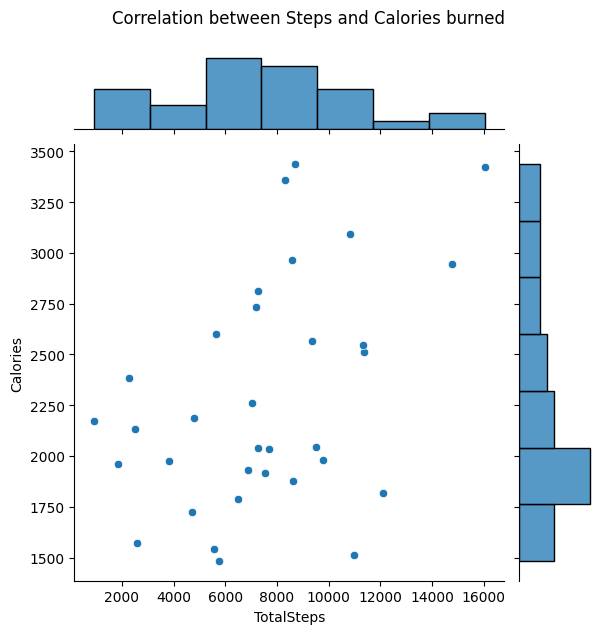

In [22]:
#Correlation between daily average users steps vs Calories burned
plt.figure(figsize=(18, 10))
sns.jointplot(x='TotalSteps', y='Calories', data = merged_data_avg, kind='scatter')
plt.suptitle('Correlation between Steps and Calories burned', y=1.05)
plt.savefig('stepvscalo.jpg')
plt.show()

The Joint chart above shows the impact of Steps taken on Calories burned. There is a direct proportional relationship between the two factors. Participants who took more steps burned more calories

<Figure size 1800x1000 with 0 Axes>

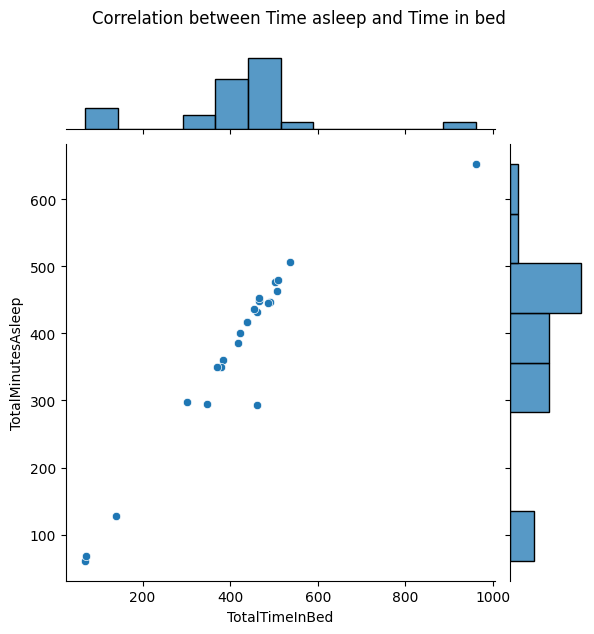

In [23]:
#Correlation between daily average users time asleep vs time in bed
plt.figure(figsize=(18, 10))
sns.jointplot(x='TotalTimeInBed', y='TotalMinutesAsleep', data = merged_data_avg, kind='scatter')
plt.suptitle('Correlation between Time asleep and Time in bed', y=1.05)
plt.show()

The Chart illustrate a strong positive relationship between time in bed and the time asleep. This means spending time on bed increases ones chance of sleeping

<Figure size 1800x1000 with 0 Axes>

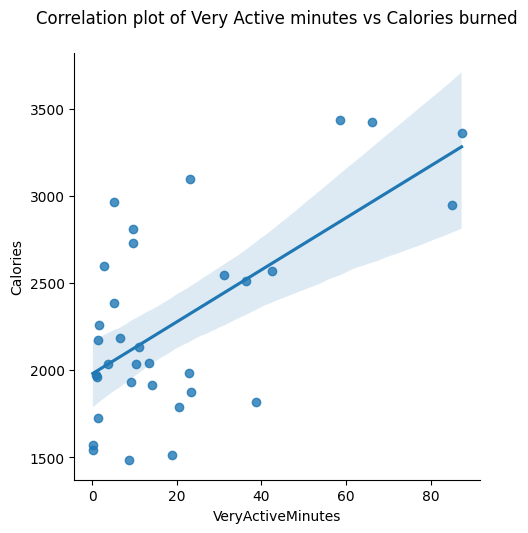

In [24]:
#correlationship between Veryactive minutes and Calories burned
plt.figure(figsize=(18, 10))
sns.lmplot(x='VeryActiveMinutes', y='Calories', data=merged_data_avg)
plt.title('Correlation plot of Very Active minutes vs Calories burned', y=1.05)
plt.show()

This clearly shows that increase in Very active minutes increases the amount of Calories burned. 

<Figure size 1800x1000 with 0 Axes>

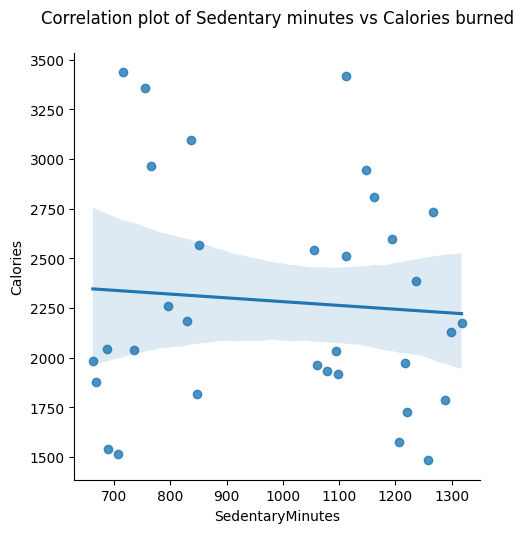

In [25]:
#correlationship between Veryactive minutes and Calories burned
plt.figure(figsize=(18, 10))
sns.lmplot(x='SedentaryMinutes', y='Calories', data=merged_data_avg)
plt.title('Correlation plot of Sedentary minutes vs Calories burned', y=1.05)
plt.show()

This shows that increase in sedentary time negatively impacts amount of calories burned. More sedentary time is very unhealthy as it do not burn calories.

In [26]:
merged_day_avg=merged_data.groupby('Day')[['TotalSteps','Calories','TotalMinutesAsleep', 'VeryActiveMinutes']].mean()

In [27]:
sorted_by_days=merged_day_avg.sort_values(by='TotalSteps', ascending=False)
sorted_by_days.head(10)

,TotalSteps,Calories,TotalMinutesAsleep,VeryActiveMinutes
Day,,,,
Saturday,8152.975806,2354.967742,419.070175,21.919355
Tuesday,8125.006579,2356.013158,404.538462,22.953947
Monday,7780.866667,2324.208333,419.500000,23.108333
Wednesday,7559.373333,2302.620000,434.681818,20.780000
Friday,7448.230159,2331.785714,405.421053,20.055556
Thursday,7405.836735,2199.571429,401.296875,19.408163
Sunday,6933.231405,2263.000000,452.745455,19.983471


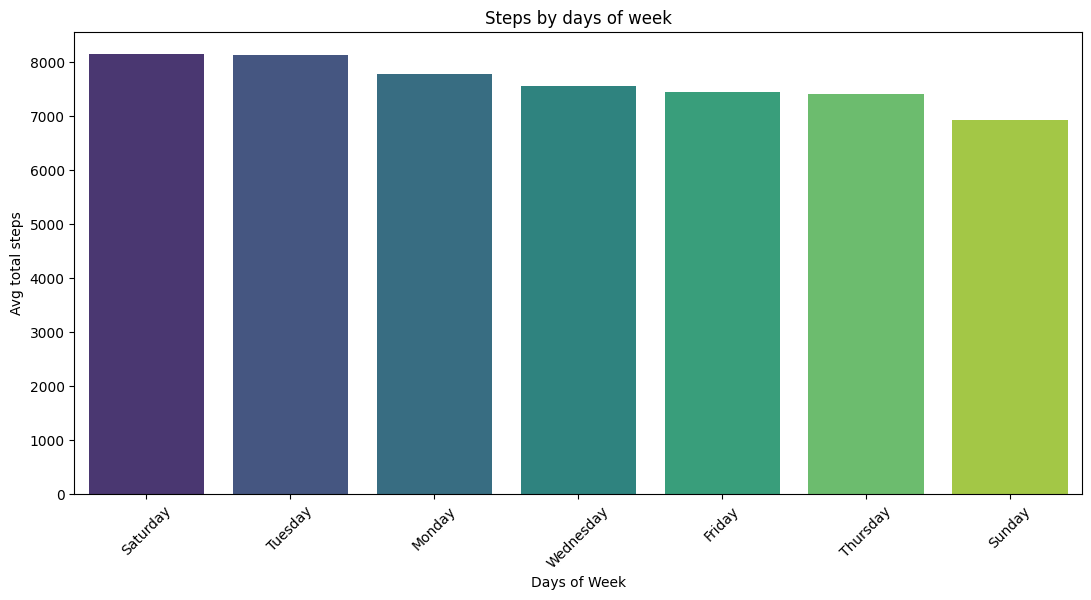

In [28]:
#Days of week distribution of average Number of steps taken by users
plt.figure(figsize=(13, 6))
sns.barplot(x='Day', y='TotalSteps', data=sorted_by_days, palette='viridis', hue='Day')
plt.xlabel('Days of Week')
plt.ylabel('Avg total steps')
plt.title('Steps by days of week')
plt.xticks(rotation= 45)
plt.show()

The bar plot and table above indicates that participants takes more steps and spend more very active minutes on saturdays, tuesdays and mondays than the rest of the days

In [29]:
intensity_avg=intensity.groupby('Time')[['TotalIntensity']].mean()

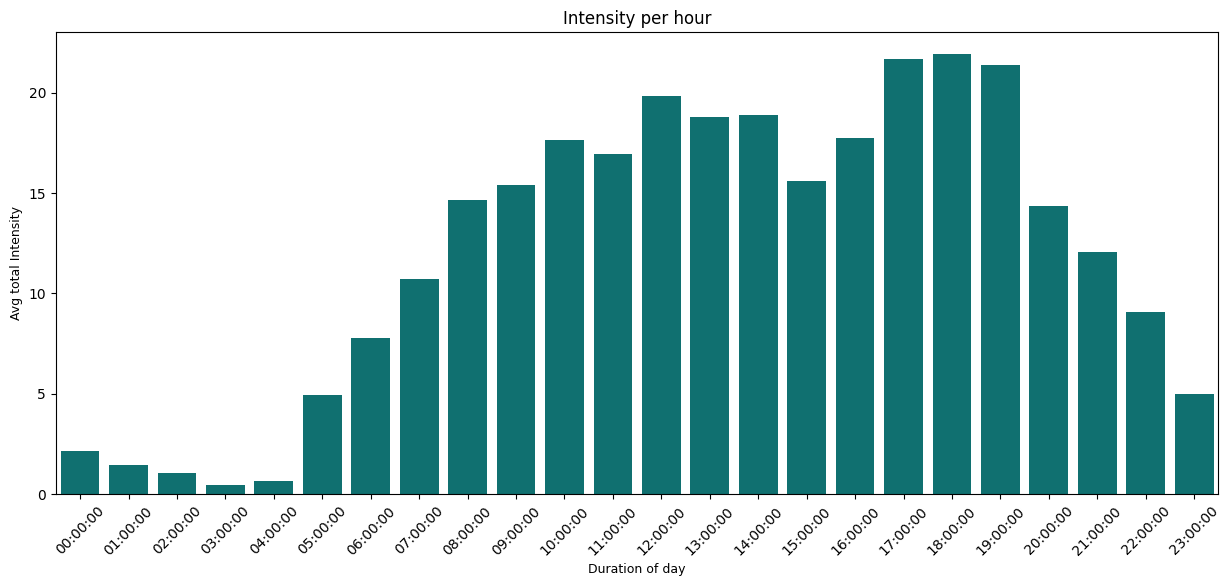

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x='Time', y='TotalIntensity', data=intensity_avg, color='teal')
plt.ylabel('Avg total Intensity', fontsize=9)
plt.xlabel('Duration of day', fontsize=9)
plt.title('Intensity per hour', fontsize=12)
plt.xticks(rotation= 45)
plt.show()

The bar chart above shows the distribution of the participants' light to very active hours. the low in the early morning hours could indicate when they are mostly asleep while their peak period is between 5 pm and 7 pm which indicates when they are commuting back from work or spending time at the gym or going for a walk.

# Phase 5: Conclusion and Recommendation

From the overall analysis;
* The number of steps taken has a positive correlation with amount of calories burned. An increase in number of steps will increase the amount of calories burned.
* The time asleep has a very weak to no correlation with amount of calories burned. Sleeping does not help in burning calories.
* Sedentary time has a negative correlation between steps taken, amount of calories burned and time asleep. Reducing the sedentary minutes is important in staying healthy.
* About 75% of participants did not make use of the weight feature. A sign the participants found it less interesting or difficult to use.
* The participants lightly to very active hours are between 7 a.m. and 10 p.m

**Applying above trend to The Bellabeat's App**
* Notification on daily steps taken: Sending out notifications within the moderate to high intensity activity hours of the app users to remind and encourage them to take at least 8000 steps (in consideration to CDC research results for young and old people). Along with interesting ideas on how users can fit more steps into their routine.
* Notification on daily sleep time: Encouraging users to setup sleeping schedule with respect to their personal routines in order to acheive atleast 8 hours (480 minutes) of recommended sleep time and sending out reminders to encourage them to go bed 3 minutes before their scheduled sleep time since it increases the chances of them falling asleep.
* Should not include weight feature in their product as majority of their users may likely find it uninteresting or very sensitve information to share.
* Tracking and Notification on daily sedentary time: Sending out notification on sedentary time to encourage users to limit sedentary time to 8 hours or less per day

**Marketing strategy**
* The product should be marketed on key features and benefits that users find attractive. (steps taken, burned calories, and sleep )
* Targeted messaging, tailored to resonate with different users segement and their goals

Thank you!